In [1]:
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [29]:
df = pd.read_csv('data/student_lifestyle_dataset.csv')
df.drop(columns=['Student_ID'], inplace=True)
#df.head(10)
#df.columns # kolonu vertibas
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   Stress_Level                     2000 non-null   object 
 6   Gender                           2000 non-null   object 
 7   Grades                           2000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 125.1+ KB


Varam secinat ka ar datiem ir viss kartiba un nav trukstosas vertibas

In [31]:
df["Stress_Level"] = df["Stress_Level"].astype("category")
df["Stress_Level_cat"] = df["Stress_Level"].cat.codes

df["Gender"] = df["Gender"].astype("category")
df["Gender_cat"] = df["Gender"].cat.codes
print(df.dtypes)
df.head(10)

Study_Hours_Per_Day                 float64
Extracurricular_Hours_Per_Day       float64
Sleep_Hours_Per_Day                 float64
Social_Hours_Per_Day                float64
Physical_Activity_Hours_Per_Day     float64
Stress_Level                       category
Gender                             category
Grades                              float64
Stress_Level_cat                       int8
Gender_cat                             int8
dtype: object


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades,Stress_Level_cat,Gender_cat
0,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48,2,1
1,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88,1,0
2,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68,1,1
3,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20,2,1
4,8.1,0.6,6.5,2.2,6.6,High,Male,8.78,0,1
5,6.0,2.1,8.0,0.3,7.6,Moderate,Female,7.12,2,0
6,8.0,0.7,5.3,5.7,4.3,High,Male,7.70,0,1
7,8.4,1.8,5.6,3.0,5.2,High,Male,8.00,0,1
8,5.2,3.6,6.3,4.0,4.9,Low,Male,7.05,1,1
9,7.7,0.7,9.8,4.5,1.3,Moderate,Female,6.90,2,0


Kategorisku datu parveidosana uz int8 tipa datiem prieks manipulacijam

In [24]:
print(df['Stress_Level'].value_counts())
print(df['Gender'].value_counts())

print(df['Stress_Level_cat'].value_counts())
print(df['Gender_cat'].value_counts())


Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64
Gender
Male      1016
Female     984
Name: count, dtype: int64
Stress_Level_cat
0    1029
2     674
1     297
Name: count, dtype: int64
Gender_cat
1    1016
0     984
Name: count, dtype: int64


array([[<Axes: title={'center': 'Study_Hours_Per_Day'}>,
        <Axes: title={'center': 'Extracurricular_Hours_Per_Day'}>,
        <Axes: title={'center': 'Sleep_Hours_Per_Day'}>],
       [<Axes: title={'center': 'Social_Hours_Per_Day'}>,
        <Axes: title={'center': 'Physical_Activity_Hours_Per_Day'}>,
        <Axes: title={'center': 'Grades'}>],
       [<Axes: title={'center': 'Stress_Level_cat'}>,
        <Axes: title={'center': 'Gender_cat'}>, <Axes: >]], dtype=object)

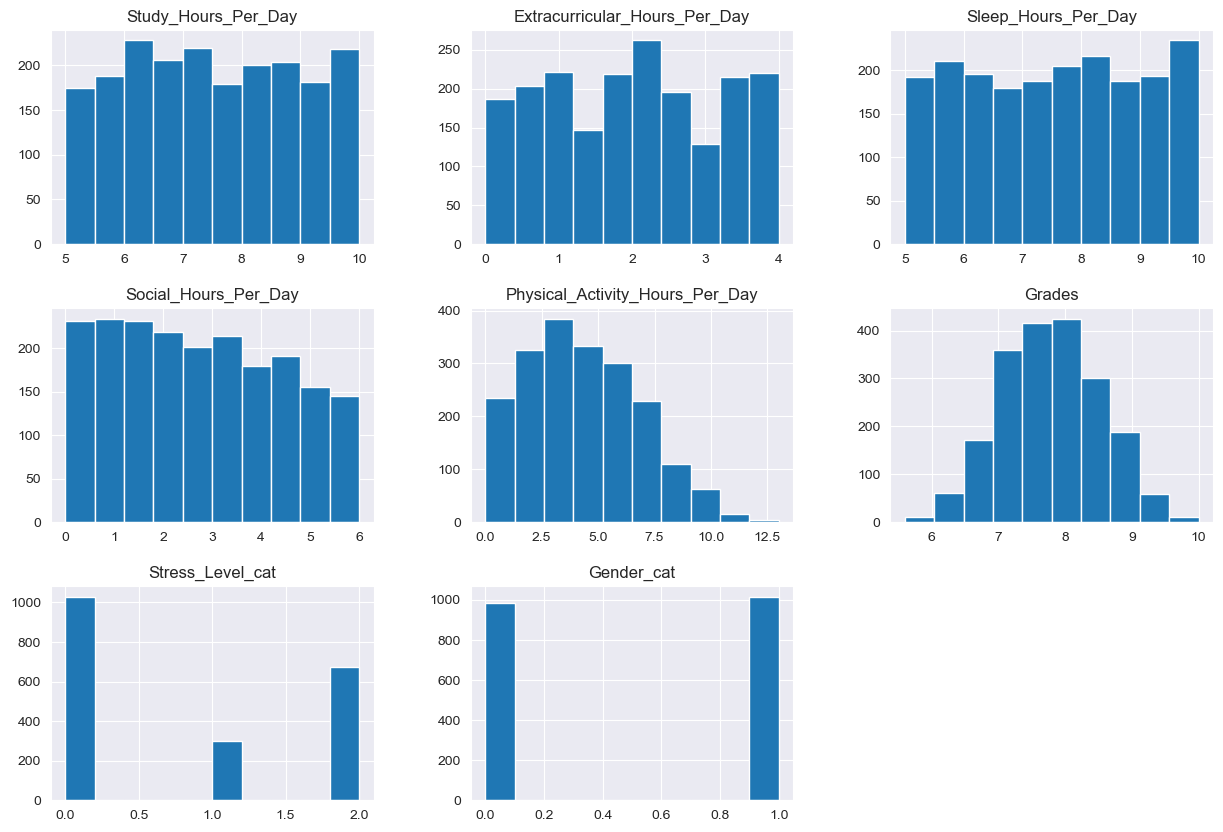

In [43]:
vizualization = df[["Study_Hours_Per_Day","Sleep_Hours_Per_Day"]]
#Vērtību attēlojuma izvade
df.hist(figsize=(15,10))

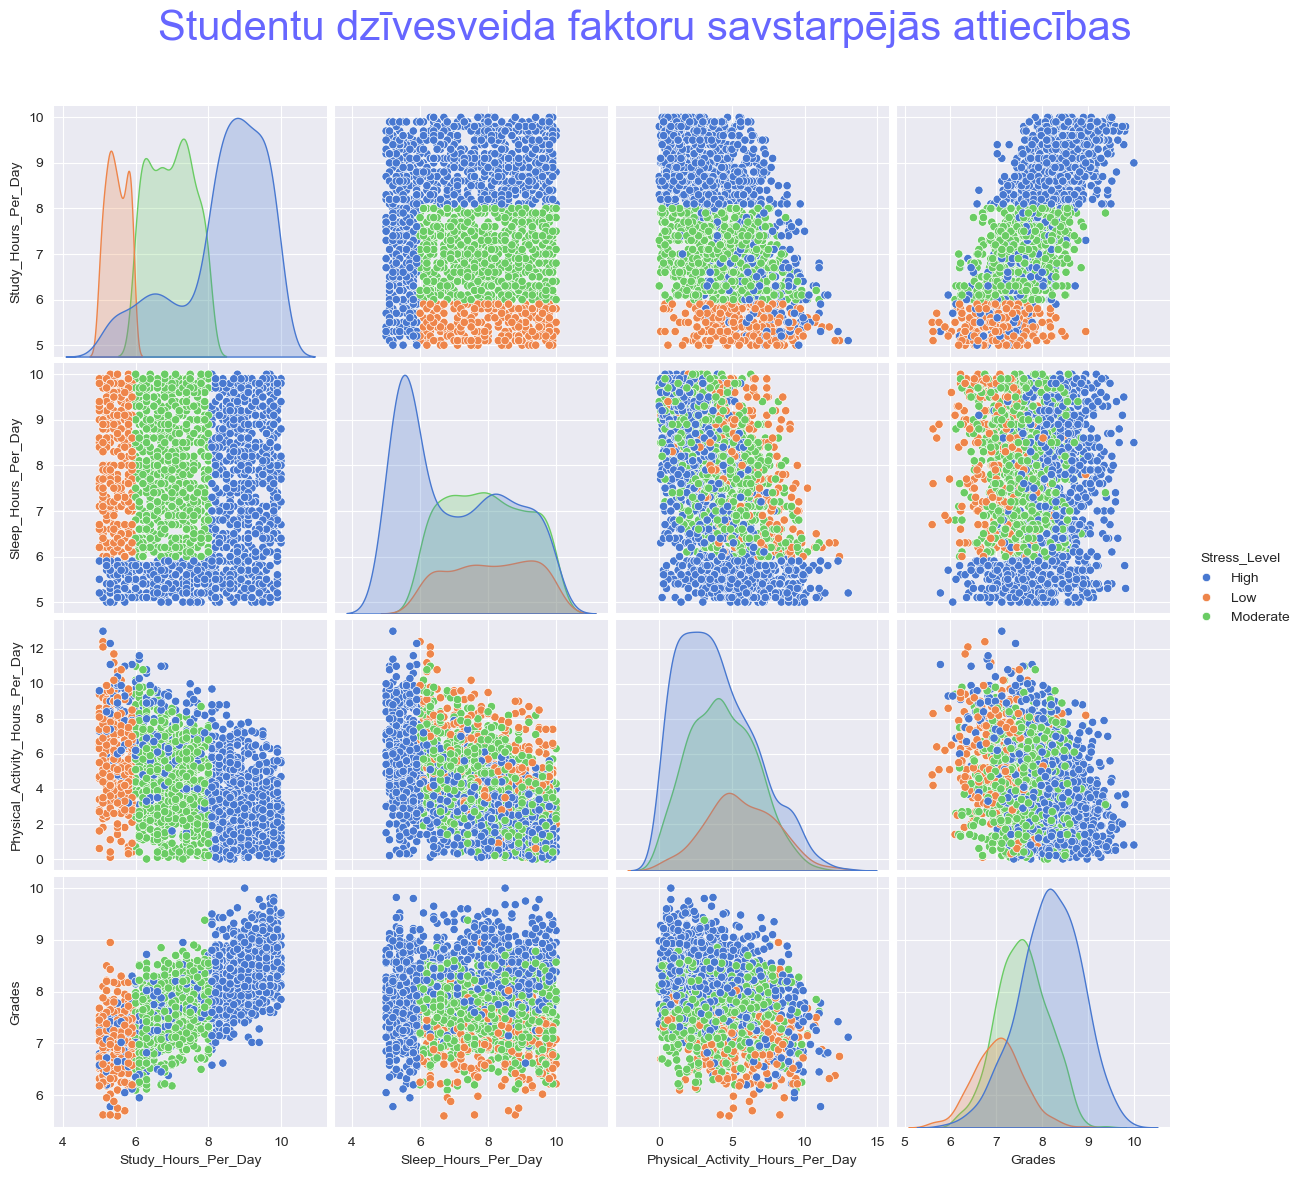

In [64]:

paru_grafiks = sns.pairplot(
    df,
    hue='Stress_Level',
    palette="muted",
    height=3,
    vars=[
        'Study_Hours_Per_Day',
        'Sleep_Hours_Per_Day',
        'Physical_Activity_Hours_Per_Day',
        'Grades'
    ],
    kind='scatter',
    diag_kind='kde'
)

plt.subplots_adjust(top=0.9)
paru_grafiks.fig.suptitle(
    'Studentu dzīvesveida faktoru savstarpējās attiecības',
    fontsize=30, color='b', alpha=0.6
)

plt.show()